---
# Taxonomic Assignment

### Questions:
- How can I know to which taxa my sequences belong to?

### Objectives:
- Understand how taxonomic assignment works.
- Use Kraken to assign taxonomies to reads and contigs.
- Visualize taxonomic assignations in graphics.

### Keypoints:
- A database with previously gathered knowledge (genomes) is needed for taxonomic assignment.
- Taxonomic assignment can be done using Kraken.
- Krona and Pavian are web-based tools to visualize the assigned taxa.

---

## Getting Started

In [ ]:
# set the variables for your netid
netid = "NETID"

In [ ]:
# Go into the working directory
work_dir = "/xdisk/bhurwitz/bh_class/" + netid + "/exercises/10_taxonomy"
%cd $work_dir

## What is a taxonomic assignment?

A taxonomic assignment is a process of assigning an Operational Taxonomic
Unit (OTU, that is, groups of related individuals) to sequences that can be 
reads or contigs. Sequences are compared against a database constructed using complete genomes. 
When a sequence finds a good enough match in the database, it is assigned to the corresponding OTU. 
The comparison can be made in different ways.  

### Strategies for taxonomic assignment  

There are many programs for doing taxonomic mapping, 
and almost all of them follow one of the following strategies:  

1. Homology: Using BLAST or DIAMOND, these mappers search for the most likely hit 
for each sequence within a database of genomes (i.e., mapping). This strategy is slow.    
  
2. Markers: They look for markers of a database made a priori in the sequences 
to be classified and assigned the taxonomy depending on the hits obtained.  

3. K-mers: A genome database is broken into pieces of length k to be able to search for unique pieces by taxonomic group, from a lowest common ancestor (LCA), 
passing through phylum to species. Then, the algorithm 
breaks the query sequence (reads/contigs) into pieces of length k,
looks for where these are placed within the tree and make the 
classification with the most probable position. 

#### Figure 1. Lowest common ancestor assignment example.

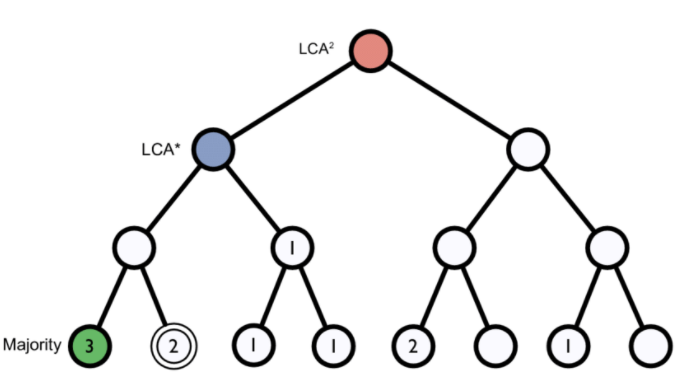

### Abundance bias  
  
When you do the taxonomic assignment of metagenomes, a key result is the abundance of each taxon or OTU in your sample. 
 The absolute abundance of a taxon is the number of sequences (reads or contigs, depending on what you did) assigned to it. 
 Moreover, its relative abundance is the proportion of sequences assigned to it. It is essential to be aware of the many biases that can skew the abundances along the metagenomics workflow, shown in the figure, and that because of them, we may not be obtaining the actual abundance of the organisms in the sample.

#### Figure 2. Abundance biases during a metagenomics protocol.

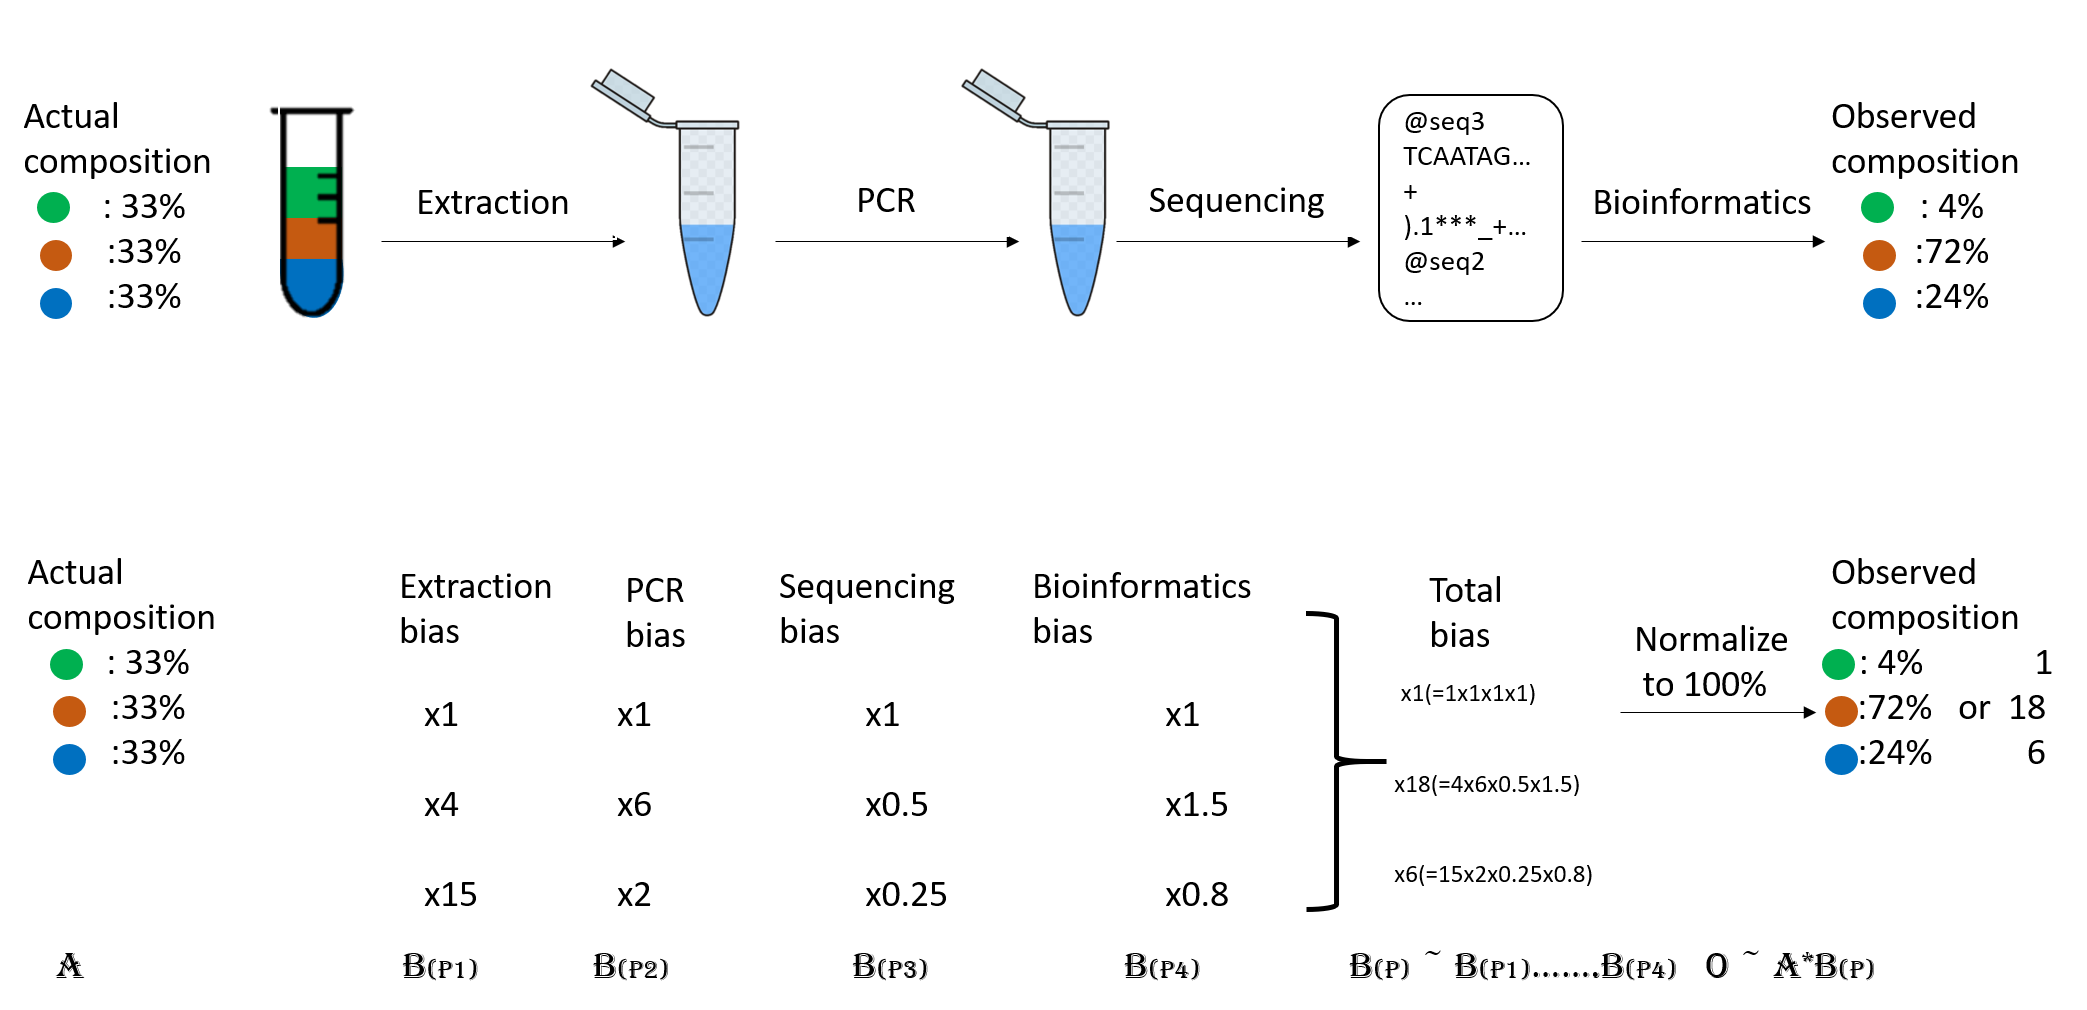

> ## Discussion: Taxonomic level of assignment
>
> What do you think is harder to assign, a species (like _E. coli_) or a phylum (like Proteobacteria)?

## Using Kraken 2

[Kraken 2](https://ccb.jhu.edu/software/kraken2/) is the newest version of Kraken, 
a taxonomic classification system using exact k-mer matches to achieve 
high accuracy and fast classification speeds. Let's looks at the help menu for kraken2:

In [ ]:
# Let's try running Kraken2
!apptainer run /contrib/singularity/shared/bhurwitz/kraken2:2.1.3--pl5321hdcf5f25_0.sif kraken2  --help

### You should see something like this...

```
Need to specify input filenames!
Usage: kraken2 [options] <filename(s)>

Options:
  --db NAME               Name for Kraken 2 DB
                          (default: none)
  --threads NUM           Number of threads (default: 1)
  --quick                 Quick operation (use first hit or hits)
  --unclassified-out FILENAME
                          Print unclassified sequences to filename
  --classified-out FILENAME
                          Print classified sequences to filename
  --output FILENAME       Print output to filename (default: stdout); "-" will
                          suppress normal output
  --confidence FLOAT      Confidence score threshold (default: 0.0); must be
                          in [0, 1].
  --minimum-base-quality NUM
                          Minimum base quality used in classification (def: 0,
                          only effective with FASTQ input).
  --report FILENAME       Print a report with aggregate counts/clade to file
  --use-mpa-style         With --report, format report output like Kraken 1's
                          kraken-mpa-report
  --report-zero-counts    With --report, report counts for ALL taxa, even if
                          counts are zero
  --report-minimizer-data With --report, report minimizer, and distinct minimizer
                          count information in addition to normal Kraken report
  --memory-mapping        Avoids loading database into RAM
  --paired                The filenames provided have paired-end reads
  --use-names             Print scientific names instead of just taxids
  --gzip-compressed       Input files are compressed with gzip
  --bzip2-compressed      Input files are compressed with bzip2
  --minimum-hit-groups NUM
                          Minimum number of hit groups (overlapping k-mers
                          sharing the same minimizer) needed to make a call
                          (default: 2)
  --help                  Print this message
  --version               Print version information

If none of the *-compressed flags are specified, and the filename provided
is a regular file, automatic format detection is attempted.

```  

### We need a database for Kraken2

In the help, we can see that in addition to our input files, we also need a database to compare them.  The database you use will determine the result you get for your data. Imagine you are searching for a recently discovered lineage that is not part of the available databases. Would you find it?

There are [several databases](https://benlangmead.github.io/aws-indexes/k2) 
compatible to be used with kraken2 in the taxonomical assignment process. 

We will be using the PlusPF	Standard plus Refeq protozoa & fungi from 2023-06-05 which is located in /groups/bhurwitz/databases/kraken2/k2_pluspf_20230605 for our analyses.

### Taxonomic assignment of metagenomic reads

Taxonomic assignments can either be done on the read-level before the assembly, or on the contigs after assembly.

We will run this step in our homework, but this compute time / load is too high for our in-class exercise. Instead, we will use a pre-computed file with the kraken output. 

In this case, we can use FASTQ files as inputs, which would be: 
`JP4D_R1.trim.fastq.gz` and `JP4D_R2.trim.fastq.gz`. And the outputs would be two files: the report `JP4D.report` and the kraken file `JP4D.kraken`.  
  
To run kraken2, we will use a command like this in the homework: 

*** No need to run this command, it is just provided as an example ***

```
$ apptainer run ${KRAKEN2} kraken2 --db ${DB_DIR} --paired \
  --classified-out ${OUTDIR}/cseqs#.fq --output ${OUTDIR}/kraken_results.txt \
  --report ${OUTDIR}/kraken_report.txt --use-names --threads 24 \
  JP4D_R1.trim.fastq.gz JP4D_R2.trim.fastq.gz
```

### Let us look at the precomputed outputs for `kraken2` for our JP4D reads.

### The Kraken2 File:

```
head JP4D.kraken  
```

```
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:19691:2037	0	250|251	0:216 |:| 0:217
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:14127:2052	0	250|238	0:216 |:| 0:204
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:14766:2063	0	251|251	0:217 |:| 0:217
C	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:15697:2078	2219696	250|120	0:28 350054:5 1224:2 0:1 2:5 0:77 2219696:5 0:93 |:| 379:4 0:82
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:15529:2080	0	250|149	0:216 |:| 0:115
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:14172:2086	0	251|250	0:217 |:| 0:216
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:17552:2088	0	251|249	0:217 |:| 0:215
U	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:14217:2104	0	251|227	0:217 |:| 0:193
C	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:15110:2108	2109625	136|169	0:51 31989:5 2109625:7 0:39 |:| 0:5 74033:2 31989:5 1077935:1 31989:7 0:7 60890:2 0:105 2109625:1
C	MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:19558:2111	119045	251|133	0:18 1224:9 2:5 119045:4 0:181 |:| 0:99
```

This information may need to be clarified. Let us take out our cheatsheet to understand some of its components:


|------------------------------+------------------------------------------------------------------------------|  
| Column example                      |                              Description                                     |  
|------------------------------+------------------------------------------------------------------------------|  
|   C                          |  Classified or unclassified                                                  |  
|------------------------------+------------------------------------------------------------------------------|  
|   MISEQ-LAB244-W7:156:000000000-A80CV:1:1101:15697:2078               |FASTA header of the sequence         |   
|------------------------------+------------------------------------------------------------------------------|  
|  2219696                     | Tax ID                                                                       |  
|------------------------------+------------------------------------------------------------------------------|  
|    250:120                   |Read length                                                                   |   
|------------------------------+------------------------------------------------------------------------------|  
|  0:28 350054:5 1224:2 0:1 2:5 0:77 2219696:5 0:93 379:4 0:82|kmers hit to a taxonomic ID *e.g.,* tax ID 350054 has five hits, tax ID 1224 has two hits, etc. |   
|-------------------+-----------------------------------------------------------------------------------------|  

### The Kraken2 report

The Kraken file is more readable. So let us look at the report file:
  
```
head JP4D.report
```

```
 78.13	587119	587119	U	0	unclassified
 21.87	164308	1166	R	1	root
 21.64	162584	0	R1	131567	  cellular organisms
 21.64	162584	3225	D	2	    Bacteria
 18.21	136871	3411	P	1224	      Proteobacteria
 14.21	106746	3663	C	28211	        Alphaproteobacteria
  7.71	57950	21	O	204455	          Rhodobacterales
  7.66	57527	6551	F	31989	            Rhodobacteraceae
  1.23	9235	420	G	1060	              Rhodobacter
  0.76	5733	4446	S	1063	                Rhodobacter sphaeroides
```

|------------------------------+------------------------------------------------------------------------------|   
| Column example  |                              Description                                     |    
|------------------------------+------------------------------------------------------------------------------|  
| 78.13 |  Percentage of reads covered by the clade rooted at this taxon                                                  |  
|------------------------------+------------------------------------------------------------------------------|  
| 587119 |   Number of reads covered by the clade rooted at this taxon
|------------------------------+------------------------------------------------------------------------------|  
| 587119  |   Number of reads assigned directly to this taxon                                                                    |  
|------------------------------+------------------------------------------------------------------------------|  
| U | A rank code, indicating (U)nclassified, (D)omain, (K)ingdom, (P)hylum, (C)lass, (O)rder, (F)amily, (G)enus, or (S)pecies. All other ranks are simply '-'.                                                                  |   
|------------------------------+------------------------------------------------------------------------------|  
| 0 |NCBI taxonomy ID |   
|-------------------+-----------------------------------------------------------------------------------------| 
| unclassified | Indented scientific name |  
|-------------------+-----------------------------------------------------------------------------------------|   

### Taxonomic assignment of the contigs of a MAG (from a bin)
 
We now have the taxonomic identity of the reads of the whole metagenome, but we need to know to which taxon our MAGs correspond to. For this, we have to make the taxonomic assignment with the contigs instead of the reads because we do not have the reads corresponding to a MAG separated from the reads of the entire sample. 

For this, the `kraken2` is a little bit different; here, we can look at the command for the `JP4D.001.fasta` MAG:

*** No need to run this command it is just provided as an example ***

```
$ apptainer run ${KRAKEN2} kraken2 --db ${DB_DIR} \
  --classified-out ${OUTDIR}/c_contigs.fa --output ${OUTDIR}/kraken_results.txt \
  --report ${OUTDIR}/kraken_report.txt --use-names --threads 24 \
  JP4D.001.fasta
```

### Let's look at some pre-computed results for taxonomy for the contigs of a MAG

We are expecting all of the contigs in this bin to be exactly the same species. Let's check if we see that.

```
$ more JP4D.001.report
```

```
 50.96	955	955	U	0	unclassified
 49.04	919	1	R	1	root
 48.83	915	0	R1	131567	  cellular organisms
 48.83	915	16	D	2	    Bacteria
 44.40	832	52	P	1224	      Proteobacteria
 19.37	363	16	C	28216	        Betaproteobacteria
 16.22	304	17	O	80840	          Burkholderiales
  5.66	106	12	F	506	            Alcaligenaceae
  2.72	51	3	G	517	              Bordetella
  1.12	21	21	S	2163011	                Bordetella sp. HZ20
  .
  .
  .
```

Looking at the report, we can see that half of the contigs are unclassified and that a tiny proportion of contigs have been assigned an organism. This result is weird because we expected only one genome in the bin. 

Hmmm...this bin looks like it might contaminated (i.e. multiple species in the same bin)

#### What does an uncomtaminated bin look like?

To exemplify how a report of a complete and uncontaminated 
MAG should look like, let's look at the report of this MAG from another study:

```
100.00	108	0	R	1	root
100.00	108	0	R1	131567	  cellular organisms
100.00	108	0	D	2	    Bacteria
100.00	108	0	P	1224	      Proteobacteria
100.00	108	0	C	28211	        Alphaproteobacteria
100.00	108	0	O	356	          Rhizobiales
100.00	108	0	F	41294	            Bradyrhizobiaceae
100.00	108	0	G	374	              Bradyrhizobium
100.00	108	108	S	2057741	                Bradyrhizobium sp. SK17
```

## Visualization of taxonomic assignment results  
  
After we have the taxonomy assignment, we can visualize our results using Krona:


[Krona](https://github.com/marbl/Krona/wiki) is a hierarchical 
data visualization software. Krona allows data to be explored with zooming 
and multi-layered pie charts and supports several bioinformatics 
tools and raw data formats. To use Krona in our results, let's first go into 
our taxonomy directory, which contains the pre-calculated Kraken outputs.  

### Krona  
With Krona, we will explore the taxonomy of the JP4D.001 MAG.

Krona is called with the `ktImportTaxonomy` command that needs an input and an output file.  

To use Krona, we need to create the input file with columns three and four from `JP4D.001.kraken` file. We can do this using the following command. Note that I already ran this for you to save time!

```
$ cut -f2,3 JP4D.001.kraken > JP4D.001.krona.input
```

In [ ]:
# Let's try running Krona
%cd /xdisk/bhurwitz/bh_class/taxonomy/mags_taxonomy
!apptainer run /contrib/singularity/shared/bhurwitz/krona:2.8.1--pl5321hdfd78af_1.sif ktImportTaxonomy -q 2 JP4D.001.krona.input -tax /groups/bhurwitz/databases/krona/KronaTools-2.8.1/taxonomy -o $work_dir/KronaReport.html

#### No need to worry about the warnings.

```
   [ WARNING ]  Score column already in use; not reading scores.
Loading taxonomy...
Importing JP4D.001.kraken...
   [ WARNING ]  The following taxonomy IDs were not found in the local database and were set to root (if they were recently added to NCBI, use updateTaxonomy.sh to update the
                local database): 2259134 80870 1637841 2052837 1804984 2109625
Writing KronaReport.html...
```

In [ ]:
# copy the html file into your home directory
!cp $work_dir/KronaReport.html ~/be487-fall-2024/exercises/10_taxonomy

#### what do you see?

Krona displays a circled-shape bacterial taxonomy plot with abundance percentages of each taxon

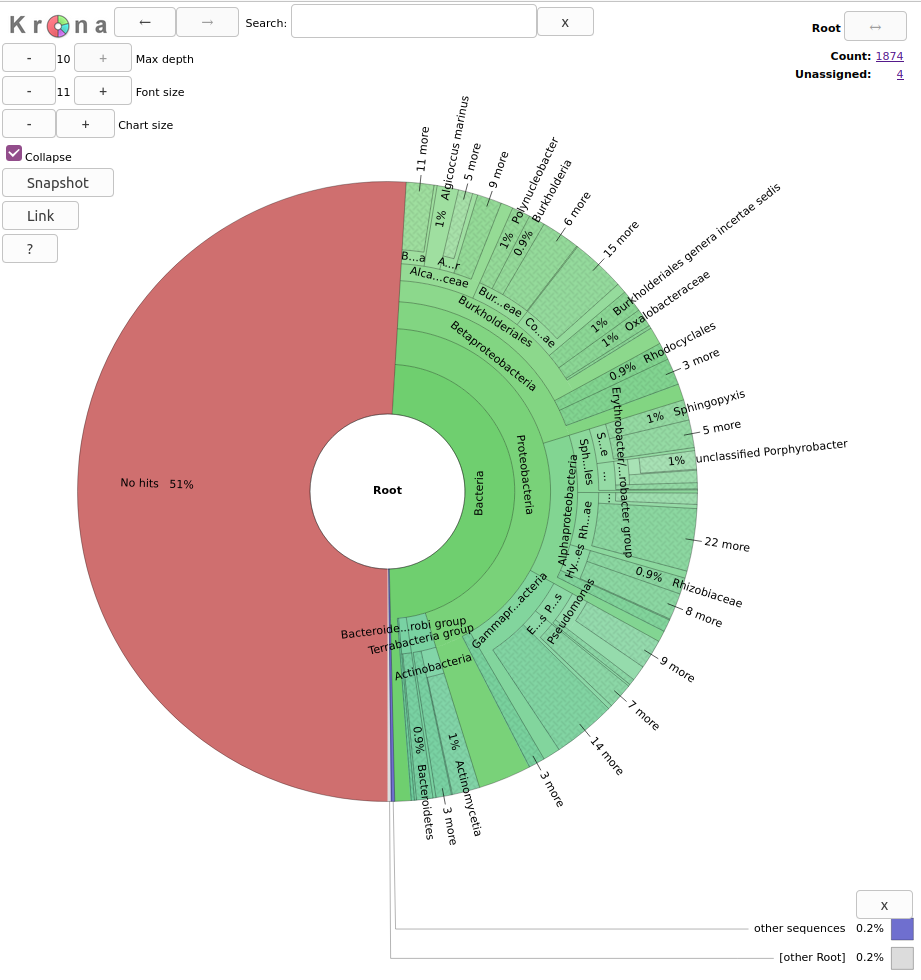

> ## Exercise 1: Exploring Krona visualization
> Try double-clicking on the pie chart segment representing Bacteria and see what happens.
> What percentage of bacteria is represented by the genus _Paracoccus_?
> 
> Hint: A search box is in the window's top left corner. 

<details>
<summary markdown="span">Solution</summary>
<ul> 
2% of Bacteria corresponds to the genus Paracoccus in this sample.
In the top right of the window, we see little pie charts that change whenever we change the visualization to expand certain taxa.   
</details>

### Pavian
Pavian is another visualization tool that allows comparison between multiple samples. Pavian should be locally installed and needs R and Shiny, but we can try the 
[Pavian demo WebSite](https://fbreitwieser.shinyapps.io/pavian/) to visualize our results.  

First, we need to download the files needed as inputs in Pavian; this time, we will visualize the assignment of the reads of both samples:
`JC1A.report` and `JP4D.report`. These files correspond to our Kraken reports.

First let's copy thes files to your home directory and download from the Jupyter server on the HPC to your local computers.

In [ ]:
!cp /xdisk/bhurwitz/bh_class/taxonomy/*report ~/be487-fall-2024/exercises/10_taxonomy

### Next you can download these files to your computer to try out Pavian

Go to the [Pavian demo WebSite](https://fbreitwieser.shinyapps.io/pavian/), 
click on Browse, and choose your reports. You need to select both reports at the same time.

#### Pavian website showing the upload of two reports

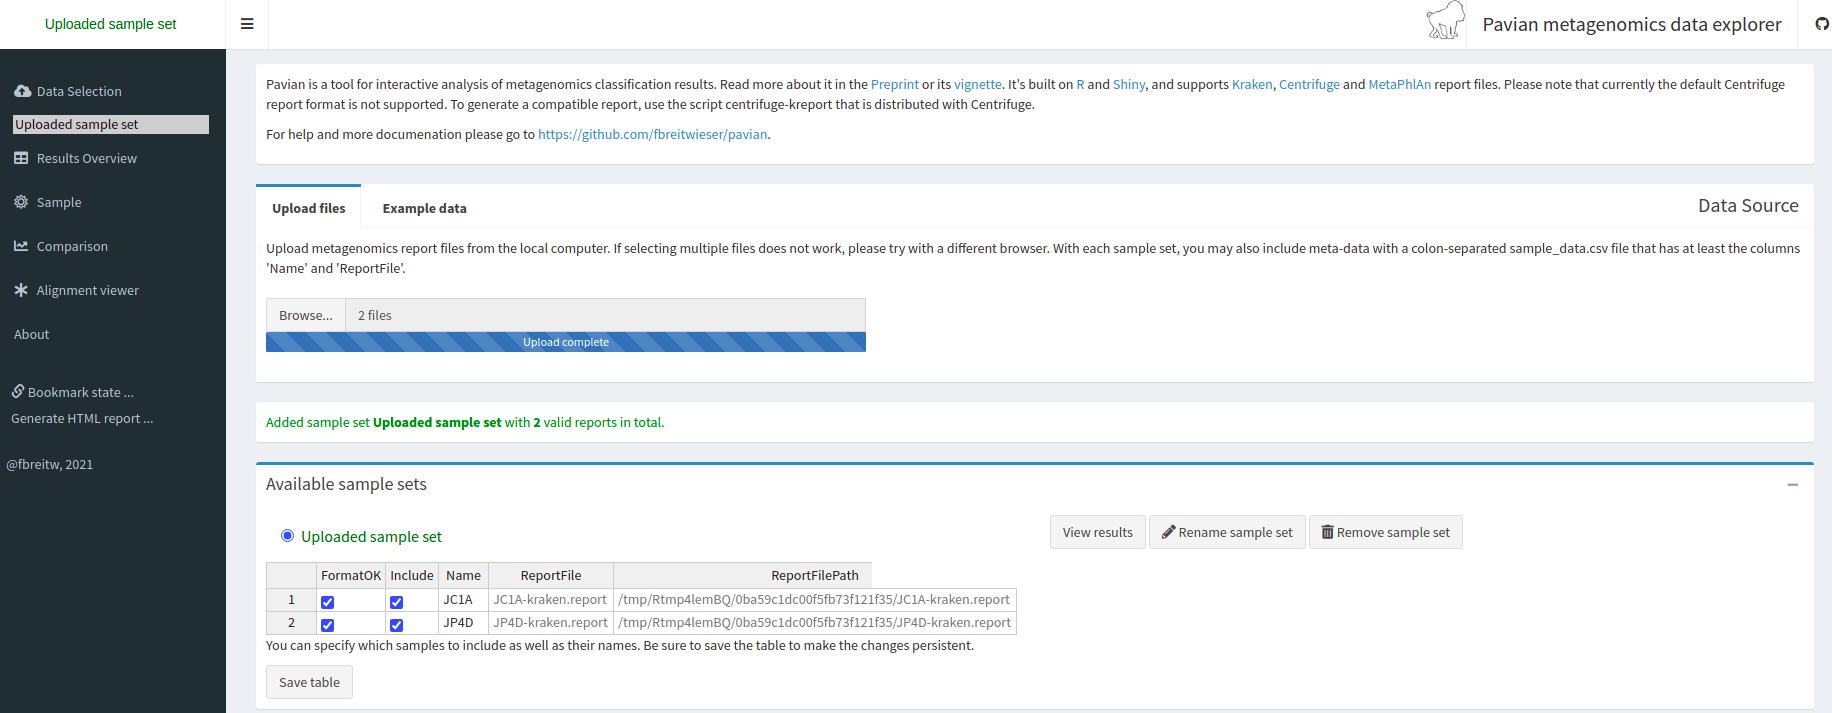

#### Click on the Results Overview tab.

Results Overview tab of the Pavian website where it shows the number of reads classified to several categories for the two samples

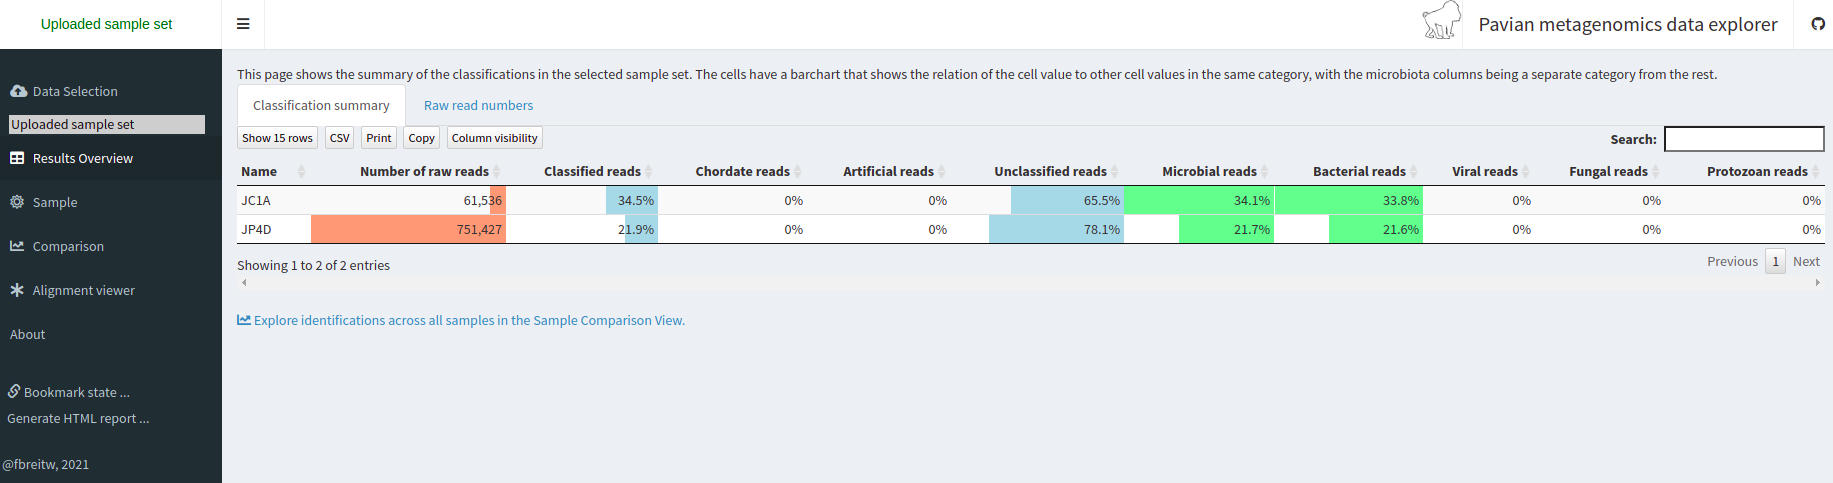

#### Click on the Sample tab.

Sankey type visualization that shows the abundance of each taxonomic label in a tree-like manner

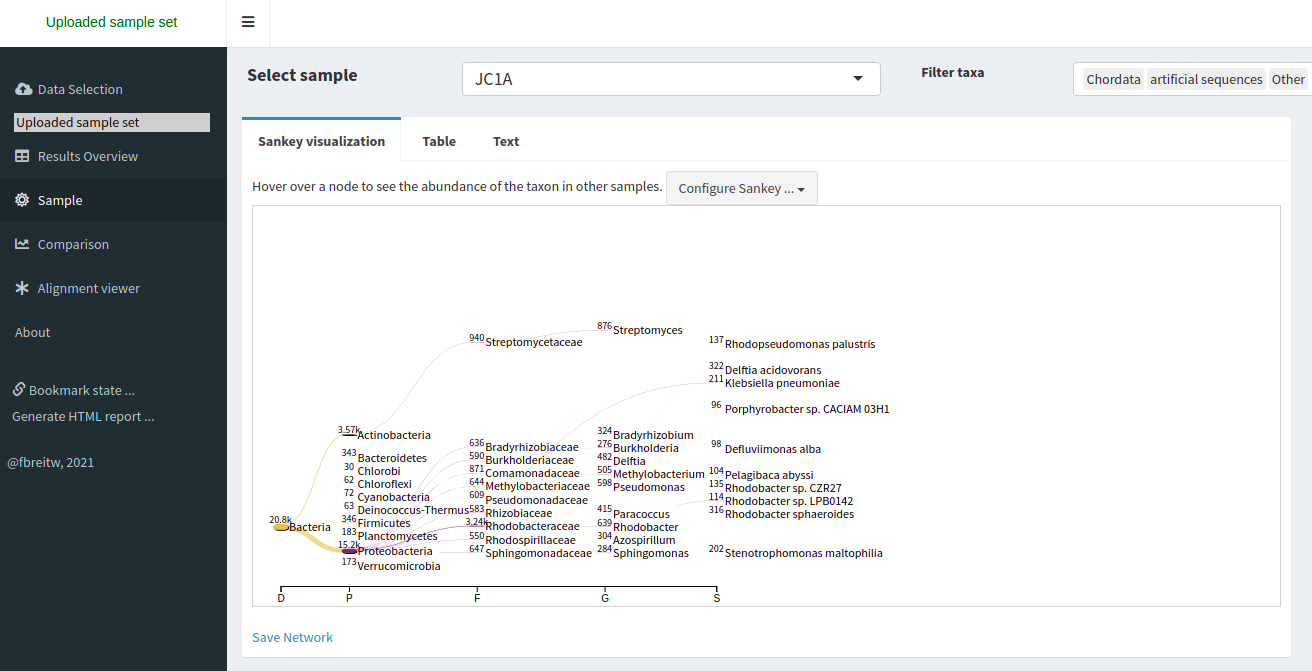

#### We can look at the abundance of a specific taxon by clicking on it.

A bar chart of the abundance of reads of the two samples, showing a segment for the read identified at the specific taxon and another segment for the number of reads identifies at children of the specified taxon

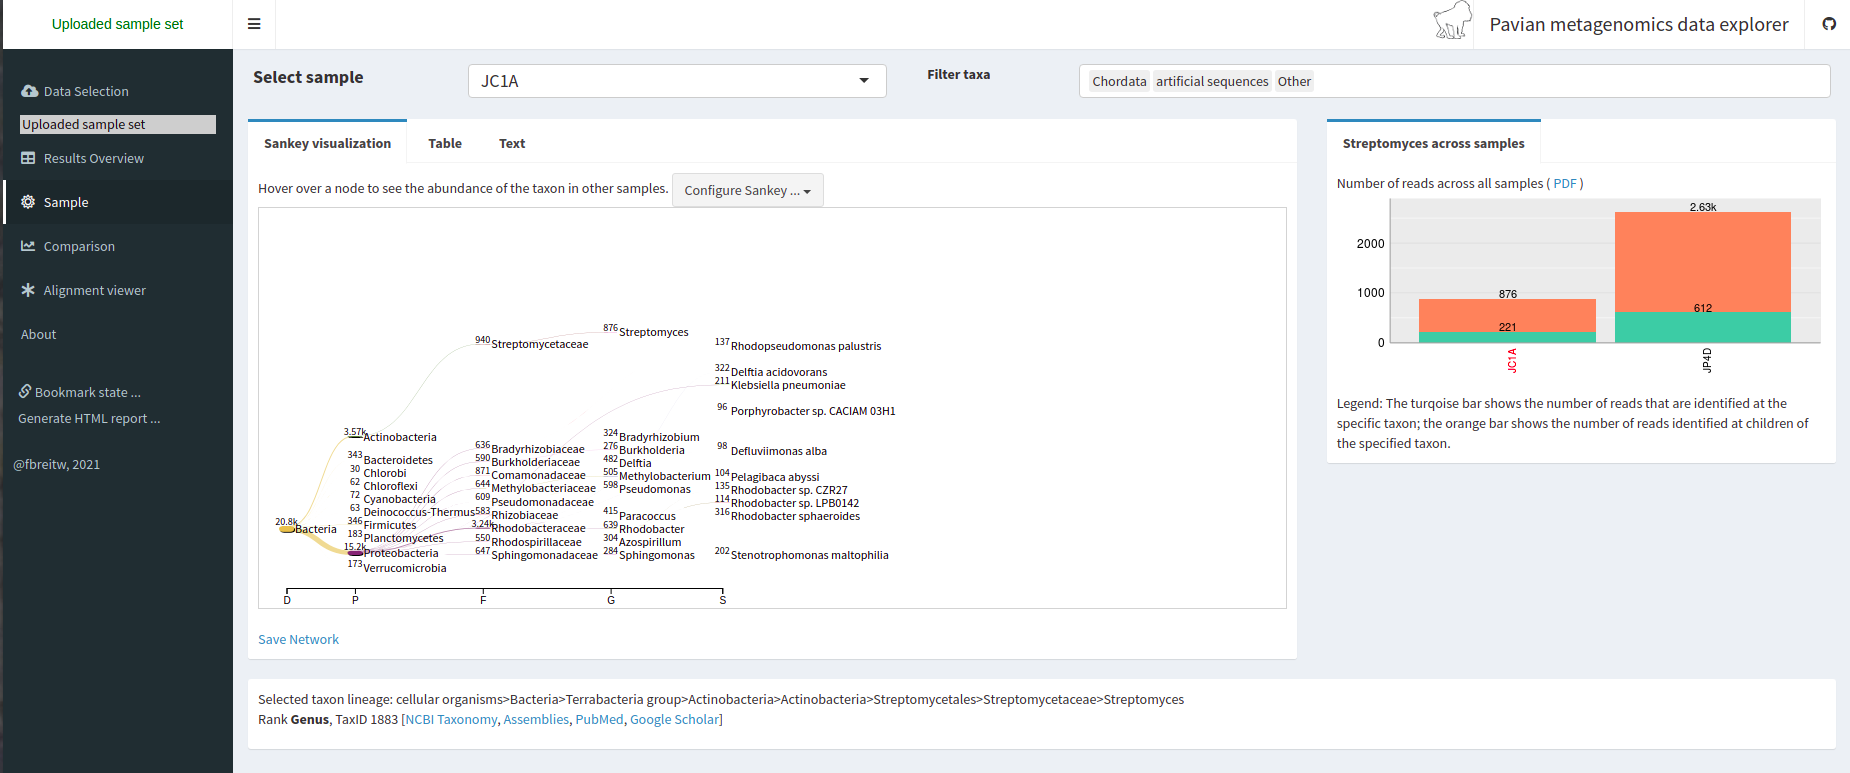

#### We can look at a comparison of both our samples in the Comparison tab. 

A table of the same format as the Kraken report but for both samples at once.

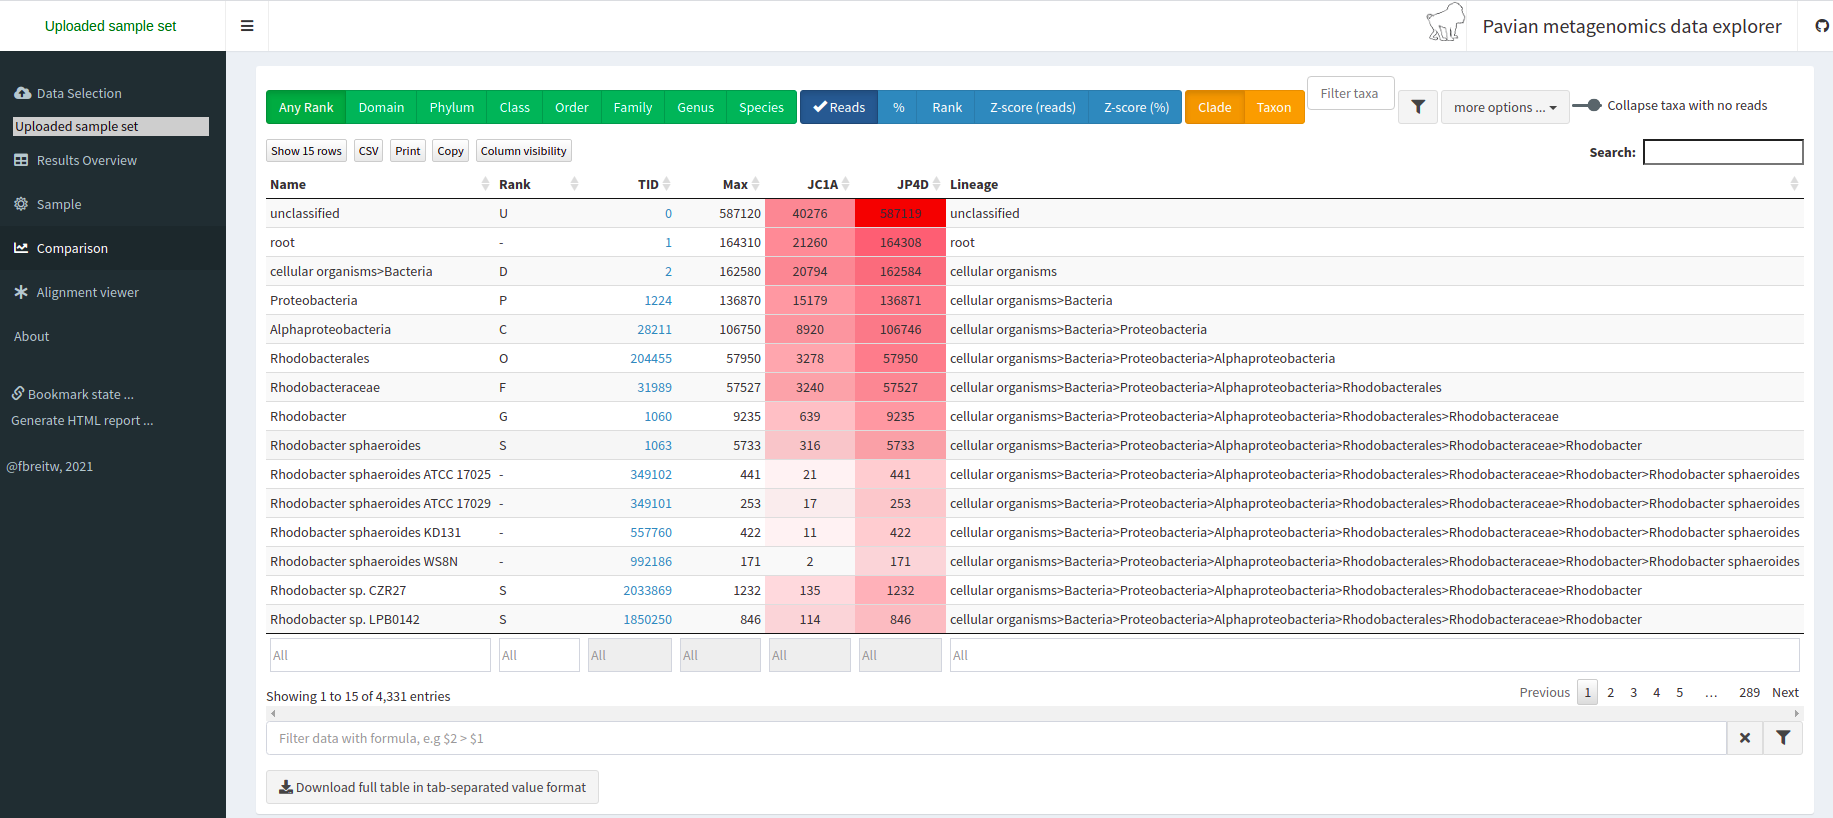


> ## Discussion: Unclassified reads
>
> As you can see, a percentage of our data could not be assigned to belong to a specific OTU.  
> Which factors can affect the taxonomic assignation so that a read is unclassified?
> 
<details>
<summary markdown="span">Solution</summary>
<ul> 

**Unclassified reads** can be the result of different factors that can go from sequencing errors to problems with the algorithm being used
to generate the result. The widely used Next-generation sequencing (NGS) platforms, 
showed [average error rate of 0.24±0.06% per base](https://www.nature.com/articles/s41598-018-29325-6).
Besides the sequencing error, we need to consider the status of the database being used to perform the taxonomic assignation.  
All the characterized genomes obtained by different research groups are scattered in different repositories, pages, and banks 
in the cloud. Some are still unpublished. Incomplete databases can affect the performance of the taxonomic assignation. Imagine that 
the dominant OTU in your sample belongs to a lineage that has never been characterized and does not have a public genome available to 
be used as a template for the database. This possibility makes the assignation an impossible task and can promote the generation of false positives
because the algorithm will assign a different identity to all those reads.
</details>

## The End

Copy your notebook for future reference...

In [ ]:
!cp ~/be487-fall-2024/exercises/10_taxonomy/ex10_taxonomy.ipynb $work_dir